In [65]:
# 기본 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# 경고 제어
import warnings
warnings.filterwarnings('ignore')
# 폰트
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# matplotlib
import matplotlib.dates as mdates
from datetime import datetime

# wordcloud
from wordcloud import WordCloud
import re

# parallel plot
from pandas.plotting import parallel_coordinates

# 폰트 확인

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print(f'사용가능한 TTF 폰트 개수 : {len(font_list)}개')
font_list[:10] # 목록에서 처음 10 개만 보기

사용가능한 TTF 폰트 개수 : 10개


['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']

In [28]:
competition=pd.read_csv('open_data/info_competition.csv',encoding='cp949',index_col=0)

In [29]:
# 추출
competition=competition[['period_start','period_end','name','keyword','participants','prize']]

# 전처리
competition['period_start']=pd.to_datetime(competition['period_start'],format="%Y-%m-%d %H:%M:%S")
competition['period_end']=pd.to_datetime(competition['period_end'],format="%Y-%m-%d %H:%M:%S")

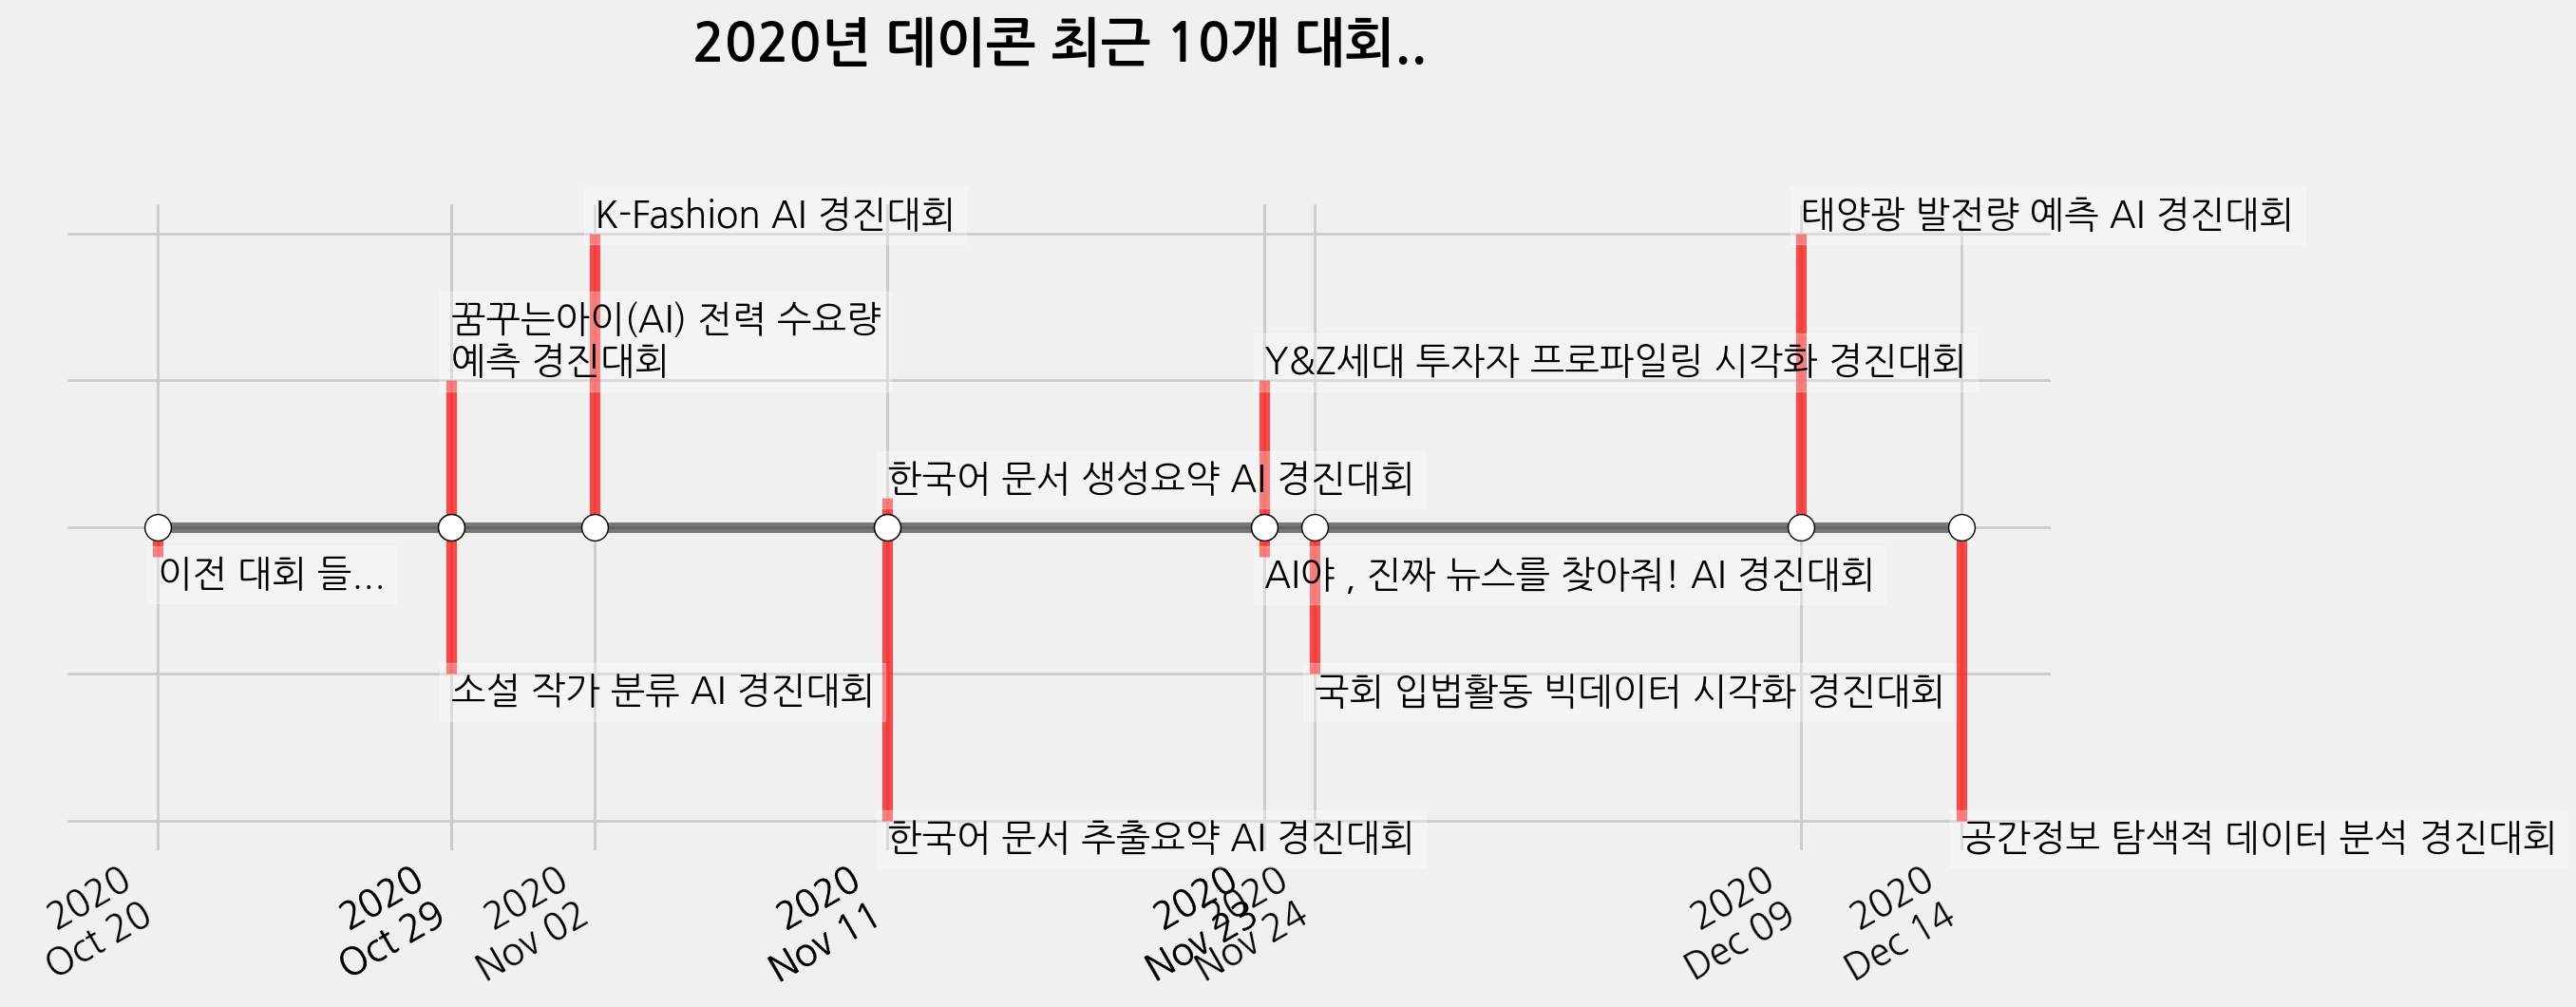

In [30]:
# 준비

names = ['공간정보 탐색적 데이터 분석 경진대회','태양광 발전량 예측 AI 경진대회',
         '국회 입법활동 빅데이터 시각화 경진대회','Y&Z세대 투자자 프로파일링 시각화 경진대회',
         'AI야 , 진짜 뉴스를 찾아줘! AI 경진대회', '한국어 문서 생성요약 AI 경진대회',
         '한국어 문서 추출요약 AI 경진대회','K-Fashion AI 경진대회','소설 작가 분류 AI 경진대회',
         '꿈꾸는아이(AI) 전력 수요량\n예측 경진대회', '이전 대회 들...']

dates = ['2020-12-14 10:00:00', '2020-12-09 12:00:00',
         '2020-11-24 13:00:00', '2020-11-23 00:00:00',
         '2020-11-23 00:00:00', '2020-11-11 10:00:00',
         '2020-11-11 10:00:00', '2020-11-02 10:00:00',
         '2020-10-29 00:00:00', '2020-10-29 00:00:00',
         '2020-10-20 00:00:00']

dates = [datetime.strptime(ii,"%Y-%m-%d %H:%M:%S") for ii in dates]
levels = np.array([-10, 10, -5, 5, -1, 1])

# 뼈대
fig, ax = plt.subplots(figsize=(12,5),dpi=200)

start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# 꾸미기
for idx, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[idx % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    ax.text(idate, level, iname,
            ha='left', va=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
    

ax.set_title("2020년 데이콘 최근 10개 대회..",y=1.2,fontweight='bold')

ax.set_xticks(dates)
ax.set_xticklabels(dates)
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y\n%b %d"))
fig.autofmt_xdate()

plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()

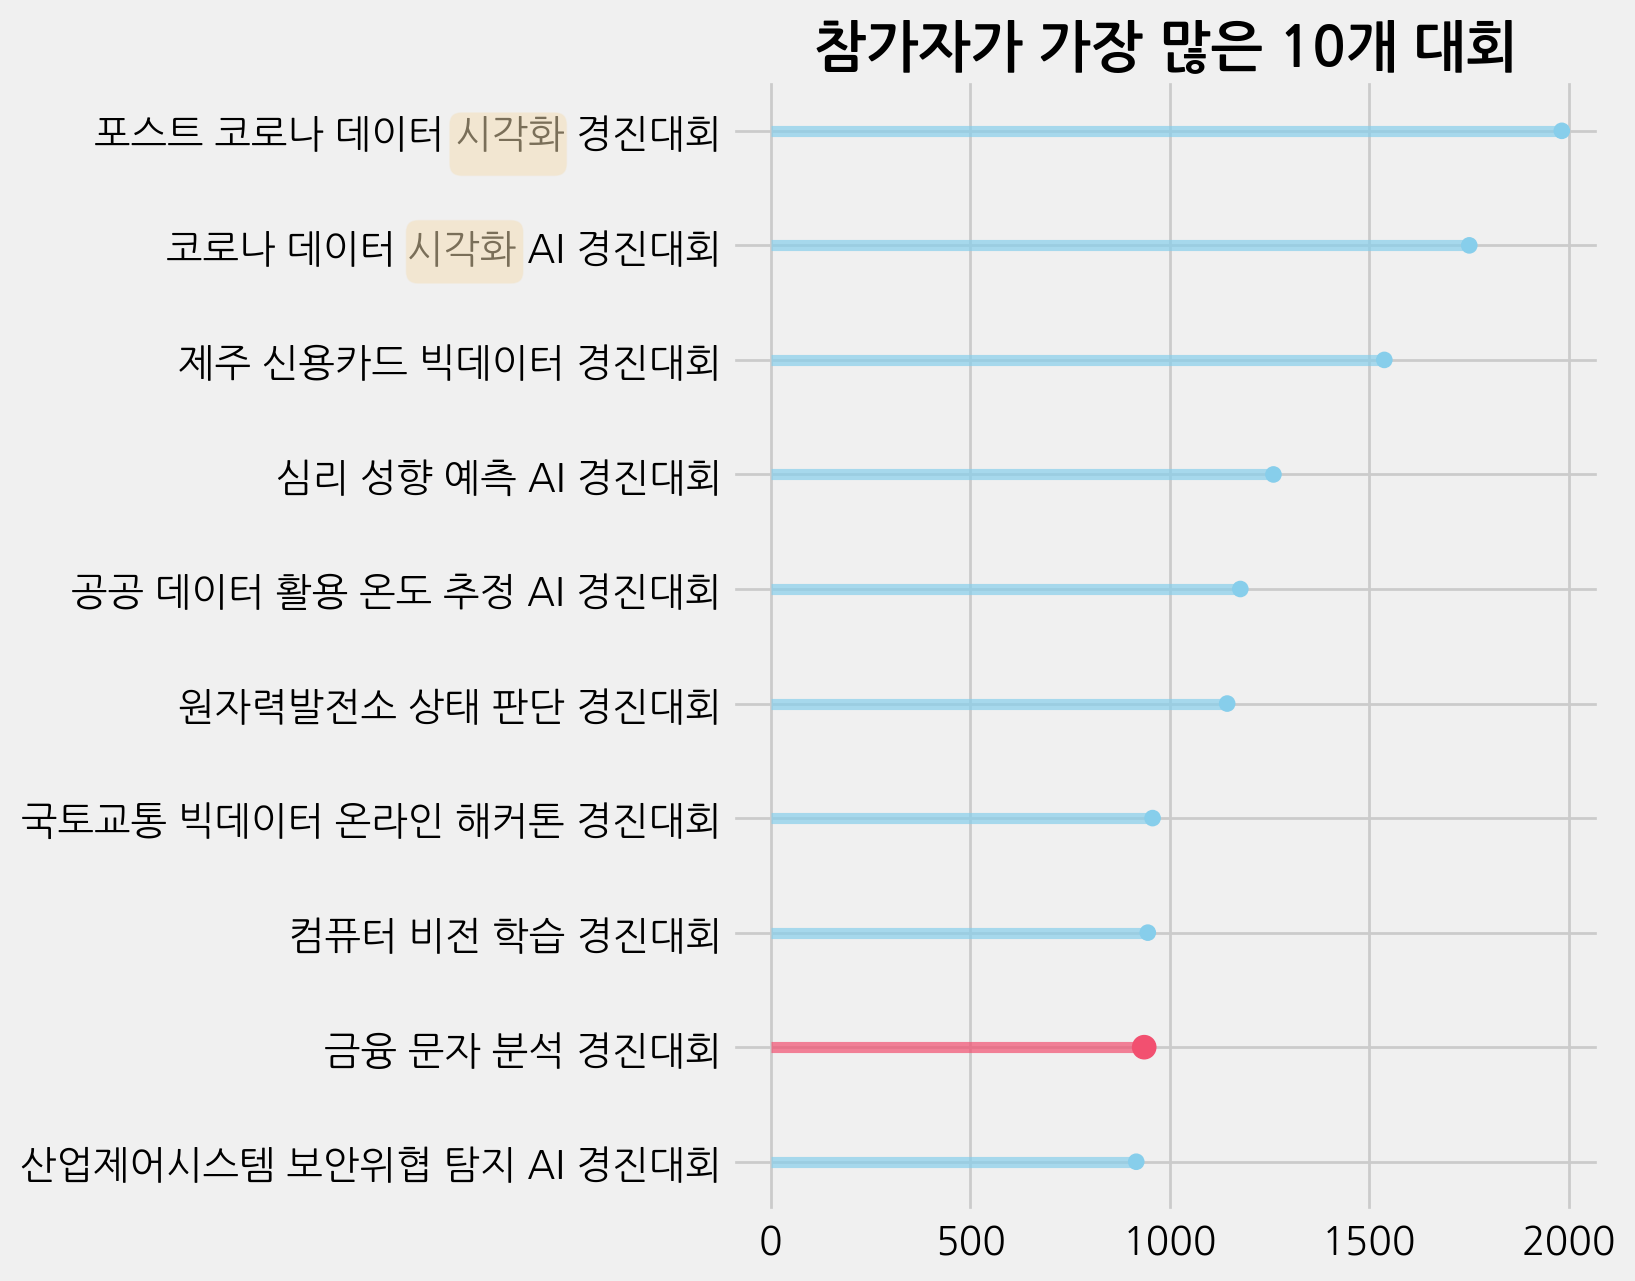

In [31]:
top10=competition[['name','participants']].sort_values(by='participants',ascending=False)[:10]

my_color=np.where(top10.name=='금융 문자 분석 경진대회','#f25070','skyblue')[::-1]
my_size=np.where(top10.name=='금융 문자 분석 경진대회',70,30)[::-1]

fig,ax=plt.subplots(1,1,figsize=(5,7),dpi=200)

ax.hlines(y=range(1,11),xmin=0,xmax=top10.participants[::-1],color=my_color,alpha=0.7)
ax.scatter(x=top10.participants.values[::-1],y=range(1,11),color=my_color,s=my_size)
# ax.barh(y=top10.name[::-1],width=top10.participants[::-1],edgecolor='black',
#         height=0.6,color="#f25070",alpha=0.8)
ax.set_title("참가자가 가장 많은 10개 대회",
             fontsize=20,fontweight='bold')

ax.set_yticks(range(1,11))
ax.set_yticklabels(top10.name[::-1])

# https://stackoverflow.com/questions/20842613/how-to-put-text-inside-a-box-on-a-plot-in-matplotlib
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(-0.31, 0.96, "        ", transform=ax.transAxes, fontsize=15,
    verticalalignment='top', bbox=props)
ax.text(-0.36, 0.865, "        ", transform=ax.transAxes, fontsize=15,
    verticalalignment='top', bbox=props)

plt.show()

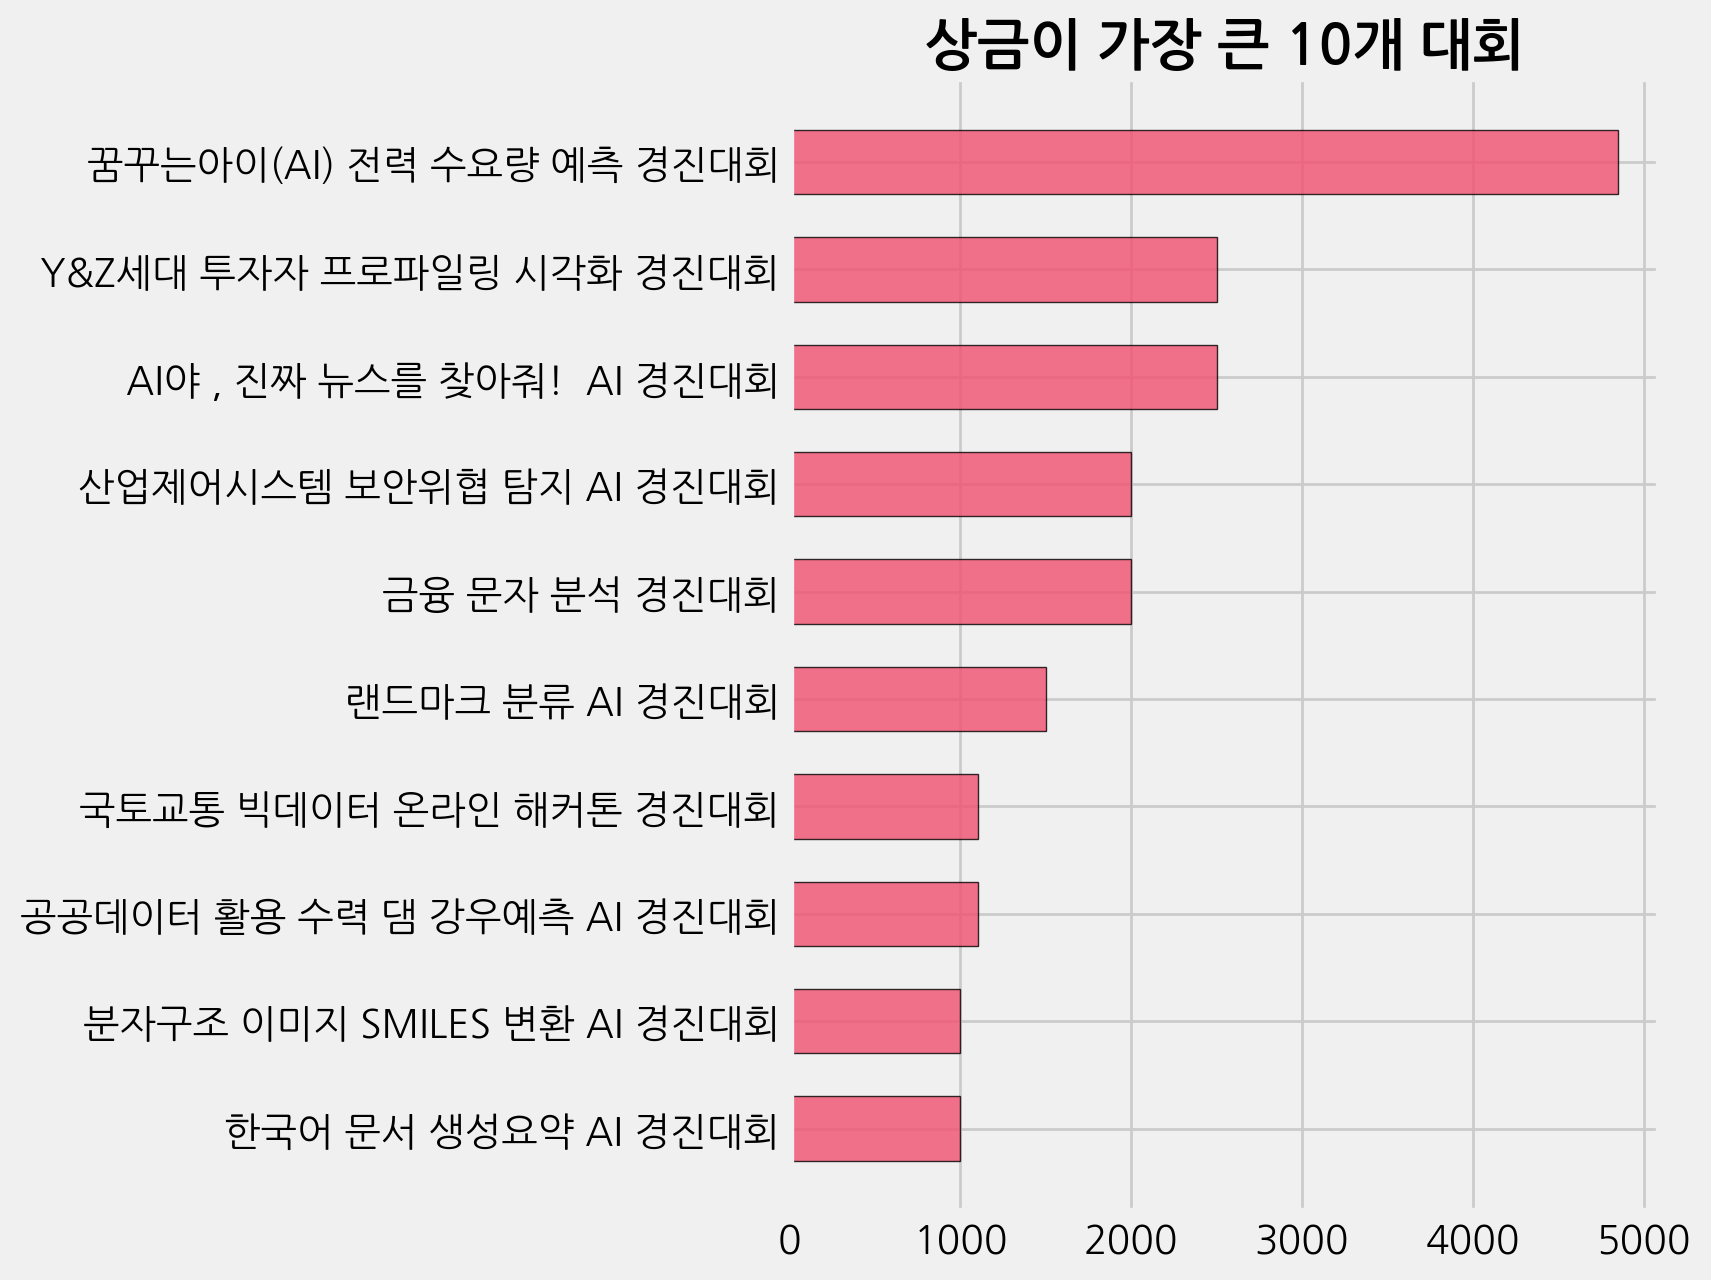

In [32]:
prize=competition[['name','prize']].sort_values(by='prize',ascending=False)[:10]

fig,ax=plt.subplots(1,1,figsize=(5,7),dpi=200)
ax.barh(y=prize.name[::-1],width=prize.prize[::-1],edgecolor='black',
        height=0.6,color="#f25070",alpha=0.8)
ax.set_title("상금이 가장 큰 10개 대회",
             fontsize=20,fontweight='bold')

plt.show()

In [33]:
# 정규식
p=re.compile('([0-9a-zA-Z가-힣]+)')

# text화
txt=np.array2string(competition['keyword'].values)
txt=p.findall(txt)
txt=' '.join(txt)

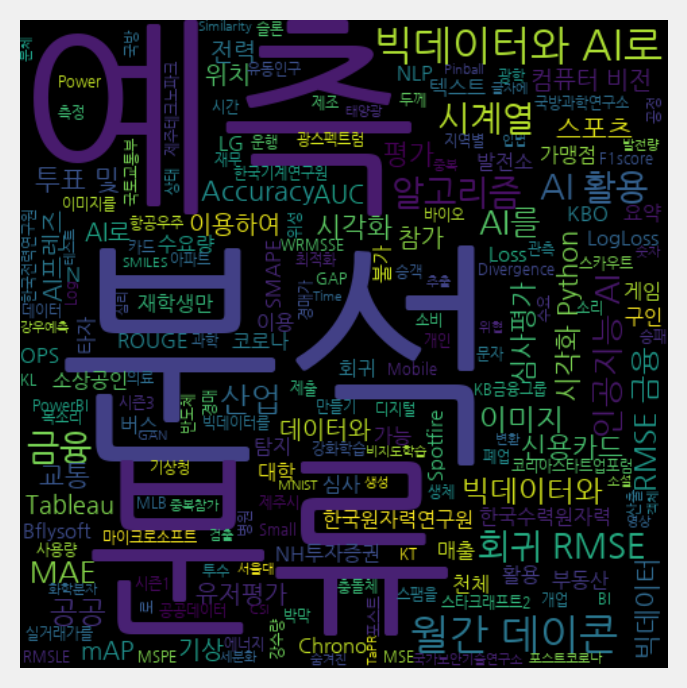

In [36]:
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
wordcloud = WordCloud(width=480, height=480, margin=0,
          font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(txt)
 
# Display the generated image:
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
ax.margins(x=0, y=0)

plt.show()

In [78]:
user=pd.read_csv('open_data/info_user.csv',index_col=0)

In [79]:
user=user.reset_index(drop=True)

In [80]:
user=user.dropna()

In [81]:
user['c_time']=pd.to_datetime(user['c_time'],format='%Y-%m-%d %H:%M').dt.date

In [82]:
user

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0,15994.0,2017-05-02,94.0,306.0,477.0,82.0,1.0,1.0
1,19195.0,2018-08-08,1.0,0.0,0.0,82.0,1.0,1.0
2,16339.0,2018-08-08,1.0,0.0,0.0,82.0,1.0,1.0
3,7290.0,2018-08-08,0.0,0.0,0.0,82.0,1.0,1.0
4,21287.0,2018-08-08,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
21687,11584.0,2020-12-08,1.0,0.0,0.0,82.0,1.0,1.0
21688,6337.0,2020-12-08,1.0,0.0,0.0,82.0,1.0,1.0
21689,2505.0,2020-12-08,1.0,0.0,0.0,82.0,1.0,1.0
21690,14182.0,2020-12-08,1.0,0.0,0.0,82.0,1.0,1.0


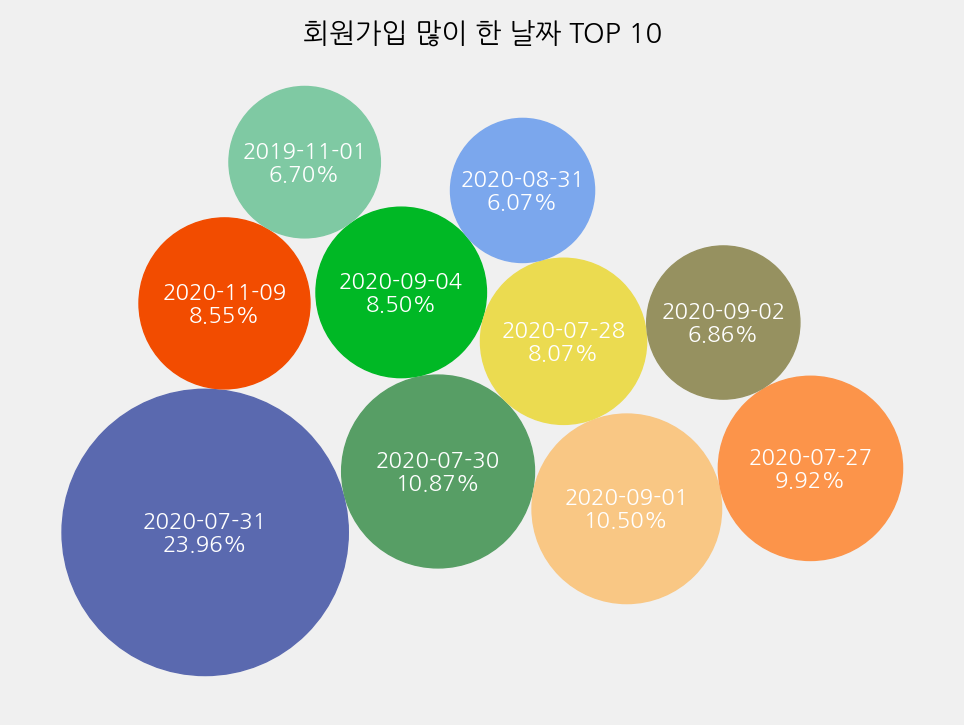

In [154]:
import numpy as np
import matplotlib

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center',color='white',fontsize=8)

############################
new_user=user.groupby('c_time')['id'].count()
new_user_top10=new_user.sort_values(ascending=False)[:10]

perc=[f"{v/1895:.2%}" for v in new_user_top10.values]
dates=[dates.strftime("%Y-%m-%d") for dates in new_user_top10.index]

idx=[dates+'\n'+perc for perc,dates in zip(perc,dates)]

my_color=['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#ebdb50',
          '#969160','#7fc9a3','#7ba7ed']


bubble_chart = BubbleChart(area=new_user_top10.values,
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=200,subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax,idx, my_color)

ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('회원가입 많이 한 날짜 TOP 10',fontsize=10)

plt.show()

In [158]:
login=pd.read_csv('open_data/info_login.csv',index_col=0)

In [165]:
login=login.dropna().reset_index(drop=True)

In [171]:
login.head()

,login_id,user_id,c_time,platform,browser
0,14196.0,19195.0,2018-09-23 1:30,Windows 8,Internet Explorer 10.0
1,14234.0,22045.0,2018-09-23 2:46,Windows,Chrome 67.0.3396.99
2,14256.0,8790.0,2018-09-23 3:35,Windows,Chrome 69.0.3497.100
3,14280.0,10206.0,2018-09-23 13:24,Windows,Chrome 68.0.3440.106
4,14288.0,488.0,2018-09-23 14:05,Windows 7,Chrome 68.0.3440.106


In [185]:
login['browser']=login['browser'].str.extract('([a-zA-Z]+)',expand=False)

In [190]:
login['platform'].unique()

array(['Windows 8', 'Windows', 'Windows 7', 'Linux', 'Android', 'Apple',
       'iPhone', 'iPad', 'unknown', 'Windows XP'], dtype=object)

In [187]:
login['browser'].value_counts()

Chrome      52535
Safari       2204
Internet     1943
iPhone       1817
Firefox      1599
iPad          163
Opera         128
Mozilla         8
Name: browser, dtype: int64

In [173]:
login.groupby(['user_id'])['platform'].value_counts()

user_id  platform 
2.0      Windows 7     1
4.0      Windows       1
12.0     Windows      23
15.0     Apple         1
16.0     Windows       1
                      ..
22092.0  Apple         1
22098.0  Windows       2
22100.0  Android       1
         Windows       1
22102.0  Windows       1
Name: platform, Length: 8019, dtype: int64